In [83]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import tifffile

In [95]:
# generate random stacks of ground truth and prediction
N = 64
B = 100
n_labels = 8
max_size = 25
max_perturb_xy = 5
max_perturb_wh = 10
p_pred = 0.3

def generator():
    while True:
        gt = np.zeros((N,N))
        p = np.zeros((N,N))

        l = 1;
        l2 = rd.randint(0, n_labels)
        for i in range( l2 ):
            x = rd.randint(0, N)
            y = rd.randint(0, N)
            w = rd.randint(2, max_size)
            h = rd.randint(2, max_size)

            if x+w >= N:
                w = N-x
            if y+h >= N:
                h = N-y

            gt[x:x+w,y:y+h] = l
            l += 1

            if rd.random() >= p_pred:
                px = rd.randint(0, max_perturb_xy)
                py = rd.randint(0, max_perturb_xy)
                pw = rd.randint(0, max_perturb_wh)
                ph = rd.randint(0, max_perturb_wh)

                x2 = x+px
                y2 = y+py
                w2 = w+pw
                h2 = h+ph

                if x2+w2 >= N:
                    w2 = N-x2
                if y2+h2 >= N:
                    h2 = N-y2

                p[x2:x2+w2,y2:y2+h2] = l2
                l2 -= 1

        yield gt, p
    
def save_stack(name):
    
    ON
    
    gts = []
    p = []
    gen = generator()

    for i in range(B):
        im, pred = next(gen)
        
        gts.append(im)
        p.append(pred)
        
    gt_np = np.array(gts)
    p_np = np.array(p)
    
    np.save('data/gt', gt_np)
    np.save('data/pred', p_np)
    
    tifffile.imwrite('data/gt.tiff', gt_np)
    tifffile.imwrite('data/pred.tiff', p_np)

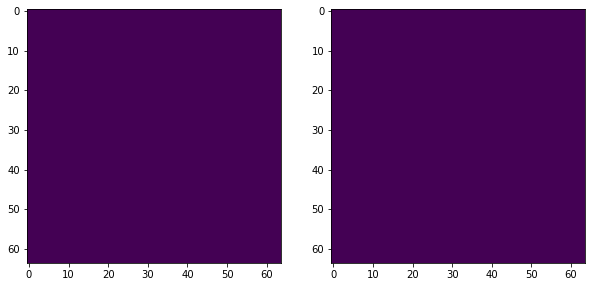

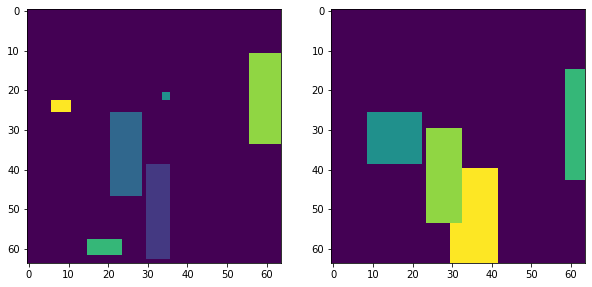

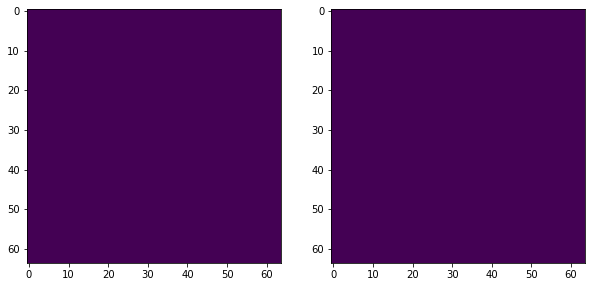

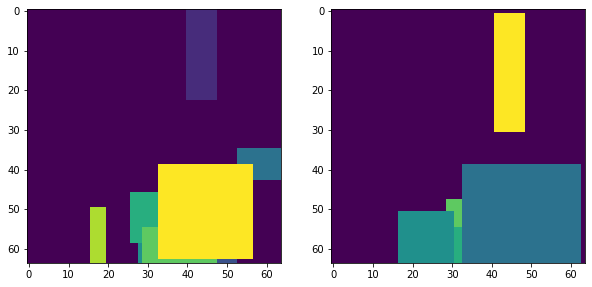

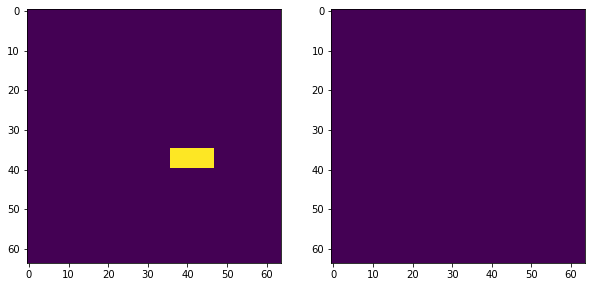

In [96]:
gen = generator()

for i in range(5):
    im, pred = next(gen)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.subplot(1,2,2)
    plt.imshow(pred)

In [97]:
save_stack()